In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


file_path = r"C:\Users\Martinz_Toyota\zhee_phyton\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv"
df_can = pd.read_csv(file_path)

df_can.head()


,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [6]:
#Logistic Regression
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [12]:
x = np.arange(2072).reshape(37, 56)  
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) 
print(x, y)

[[   0    1    2 ...   53   54   55]
 [  56   57   58 ...  109  110  111]
 [ 112  113  114 ...  165  166  167]
 ...
 [1904 1905 1906 ... 1957 1958 1959]
 [1960 1961 1962 ... 2013 2014 2015]
 [2016 2017 2018 ... 2069 2070 2071]] [0 0 0 0 1 1 1 1 1 1]


In [29]:
df_can.columns = df_can.columns.str.strip()
print(df_can.columns)

Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')


In [36]:
print(df_can.isnull().sum())

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                 41188
dtype: int64


In [39]:
df_can = df_can.dropna(subset=['y'])

X = df_can[['age', 'job', 'marital', 'housing']]  
y = df_can['y']  


In [47]:
file_path = r"C:\Users\Martinz_Toyota\zhee_phyton\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv"
df_can = pd.read_csv(file_path)

df_can = pd.read_csv(file_path, delimiter=";")
df_can.columns = df_can.columns.str.strip()
df_can = df_can.dropna(subset=['y'])
encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_columns:
    df_can[col] = encoder.fit_transform(df_can[col])
df_can['y'] = df_can['y'].map({'yes': 1, 'no': 0})
X = df_can[['age', 'job', 'marital', 'housing']]  
y = df_can['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear', random_state=0, C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 88.65%


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0,
    class_weight=None, 
    dual=False, 
    fit_intercept=True, 
    intercept_scaling=1, 
    max_iter=100,  
    n_jobs=None, 
    penalty='l2',  
    random_state=0, 
    solver='liblinear',
    tol=0.0001, 
    verbose=0, 
    warm_start=False)

model.fit(x, y)

print("Classes:", model.classes_)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Classes: [0 1]
Intercept: [-3.72253109]
Coefficients: [[ 0.0108599  -0.0330773   0.00366141]]


In [55]:
print(x.shape)  
print(y.shape)  

(37, 56)
(41188,)


In [57]:
x = df_can[['age', 'loan', 'duration']]  
y = df_can['y']  

print(x.shape)  
print(y.shape)  

(41188, 3)
(41188,)


In [64]:
model.predict_proba(x)

array([[0.89648356, 0.10351644],
       [0.92810694, 0.07189306],
       [0.92366633, 0.07633367],
       ...,
       [0.91851736, 0.08148264],
       [0.83566948, 0.16433052],
       [0.88532191, 0.11467809]])

In [65]:
model.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
model.score(x,y)

0.8933184422647373

In [67]:
confusion_matrix(y, model.predict(x))

array([[36025,   523],
       [ 3871,   769]], dtype=int64)

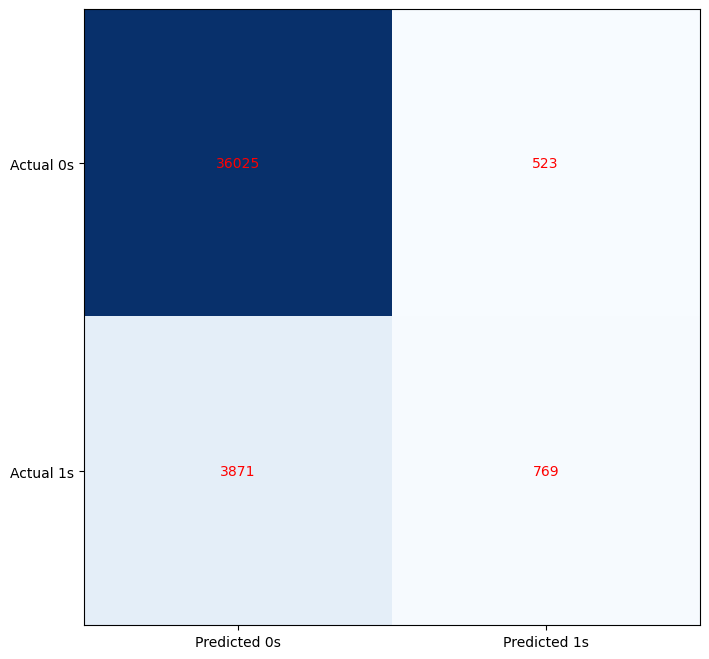

In [ ]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  
ax.grid(False)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

# Show the plot
plt.show()

In [74]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     36548
           1       0.60      0.17      0.26      4640

    accuracy                           0.89     41188
   macro avg       0.75      0.58      0.60     41188
weighted avg       0.87      0.89      0.87     41188



In [82]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.datasets import load_digits
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x, y = load_digits(return_X_y=True)
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model = LogisticRegression (solver='liblinear', C=0.05, multi_class='ovr',
random_state=0)
model. fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver='liblinear',
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=100,
    multi_class='ovr',  
    n_jobs=None,
    penalty='l2',  
    random_state=0,
    tol=0.0001,
    verbose=0,
    warm_start=False
)

model.fit(x, y)


LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [92]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
model.score(X_train, y_train)

0.7995824634655533

In [93]:
model.score(X_test, y_test)

0.125

In [95]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 29,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  5],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 38,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  2, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 38,  2]], dtype=int64)

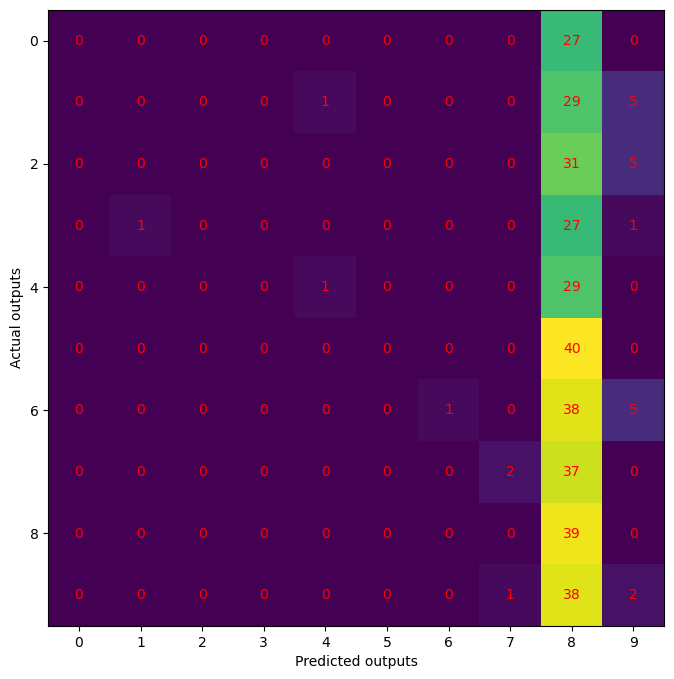

In [99]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt. subplots(figsize=(8, 8))
ax. imshow (cm)
ax. grid (False)
ax. set_xlabel('Predicted outputs'
, color= 'black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [101]:
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        27
           1       0.00      0.00      0.00        35
           2       1.00      0.00      0.00        36
           3       1.00      0.00      0.00        29
           4       0.50      0.03      0.06        30
           5       1.00      0.00      0.00        40
           6       1.00      0.02      0.04        44
           7       0.67      0.05      0.10        39
           8       0.12      1.00      0.21        39
           9       0.11      0.05      0.07        41

    accuracy                           0.12       360
   macro avg       0.64      0.12      0.05       360
weighted avg       0.63      0.12      0.05       360



In [105]:
if 'marital' in df_can.columns:
    le = preprocessing.LabelEncoder()
    df_can['marital_encoded'] = le.fit_transform(df_can['marital'])
    print(df_can[['marital', 'marital_encoded']].head())

else:
    print("The 'marital' column is not in the dataset.")

   marital  marital_encoded
0        1                1
1        1                1
2        1                1
3        1                1
4        1                1


In [111]:
from sklearn import preprocessing

marital = ['divorced', 'married', 'single', 'unknown', 'widowed']
le = preprocessing.LabelEncoder()
marital_encoded = le.fit_transform(marital)
print(marital_encoded)
print(dict(zip(le.classes_, range(len(le.classes_)))))

[0 1 2 3 4]
{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3, 'widowed': 4}


In [119]:
print(label.mode())

Series([], Name: y, dtype: float64)


In [121]:
mode_value = label.mode()
if not mode_value.empty:
    label.fillna(mode_value[0], inplace=True)
else:
    print("No mode value found")
label.fillna('no', inplace=True)

No mode value found


In [128]:
print(label.isnull().sum())

41188


In [129]:
label = label.fillna(0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

df_can = df_can.dropna(subset=['y'])
label = df_can['y'].map({'yes': 1, 'no': 0})
label = label.fillna(0) 
features = df_can[['age', 'loan', 'duration']]
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, label)
predicted = model.predict([[30, 5000, 120]])
model.fit(x, y)



c:\Users\Martinz_Toyota\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNeighborsClassifier(n_neighbors=3)